<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
# !nvidia-smi

In [15]:
# Import torch
import os
os.environ["PYTORCH_DISABLE_NNPACK"] = "1"

import torch
from torch.cpu import is_available

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
def inferDevice():
    if torch.cuda.is_available():
        return 'cuda'
    elif torch.backends.mps.is_available():
        return 'mps'
    return 'cpu'

device = inferDevice()
device

2.8.0


'mps'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In [3]:
# The model works great on the train data but not on real world examples that are different from the training data

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [4]:
# 1. 

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [5]:
from random import shuffle
import torchvision
from torchvision.transforms import ToTensor

# torchvision.datasets.MNIST('data', train=True, transofrm=ToTensor(),download=True)

train_data = torchvision.datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    # target_transform=None # you can transform labels as well
)
test_data = torchvision.datasets.MNIST(root='data', train=False, transform=ToTensor(),download=True)

test_data, train_data
image, label = test_data[5]
image.shape, label, test_data.classes


(torch.Size([1, 28, 28]),
 1,
 ['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'])

## 6. Visualize at least 5 different samples of the MNIST training dataset.

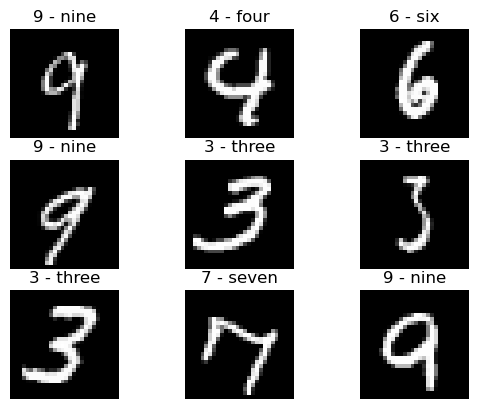

In [6]:
import matplotlib.pyplot as plt

# torch.manual_seed(42)
fig, axes = plt.subplots(3,3) 
for i, ax in enumerate(axes.flat):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    ax.imshow(image.permute(1,2,0),cmap="gray" ) # change channel to last index
    ax.axis("off")
    ax.set_title(f"{train_data.classes[label]}")

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [7]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE)
# type(train_data)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x14959ac60>, <torch.utils.data.dataloader.DataLoader object at 0x1499ebef0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [8]:
28*28

784

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [9]:
from turtle import forward
from torch import nn 
class TinyVGGModel(nn.Module):
    def __init__(self, in_channels, hidden_units, output_features):
        super().__init__()
        # 1. Layer Conv
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=in_channels, 
                out_channels=hidden_units,
                kernel_size=3, 
                padding=1,
                stride=1
                ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units, 
                out_channels=hidden_units,
                kernel_size=3, 
                padding=1,
                stride=1
                ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units, 
                out_channels=hidden_units,
                kernel_size=3, 
                padding=1,
                stride=1
                ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units, 
                out_channels=hidden_units,
                kernel_size=3, 
                padding=1,
                stride=1
                ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_features),
            # nn.ReLU(),
        )

    def forward(self, x):
        # print(f"Shape pre block 1: {x.shape}")
        res = self.conv_block_1(x)
        # print(f"Shape pre block 2: {res.shape}")
        res = self.conv_block_2(res)
        # print(f"Shape pre classifier: {res.shape}")
        return self.classifier(res)
        
vgg_model = TinyVGGModel(in_channels=1, hidden_units=10, output_features=len(train_data.classes))

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [10]:
def accuracy(X, Y):
    assert(X.shape == Y.shape)
    BOOL = (X == Y)
    # print(f"Testing accuracy for\nX:{X}\nY:{Y}\nRes:{(BOOL.sum() / len(X)).item()}")
    return (BOOL.sum() / len(X)).item()

# Calculate accuracy (a classification metric)
def acc_fn_2(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [12]:
from typing import Callable
from tqdm.auto import tqdm

def train(
    model: nn.Module,
    loss_fn: nn.CrossEntropyLoss, 
    accuracy_fn: Callable[[torch.Tensor, torch.Tensor],float], 
    optimizer: torch.optim.Optimizer, 
    dataloader: DataLoader
    ):
    model.train()
    train_loss = 0
    train_acc = 0 
    for i, (img_batch, label_batch) in enumerate(dataloader):
        # print(f"Batch {i}/{len(dataloader)}")
        # 1. Forward
        label_logits_batch = model(img_batch)
        # 2. Loss
        batch_loss = loss_fn(label_logits_batch, label_batch)
        train_loss += batch_loss
        train_labels = torch.argmax(label_logits_batch, dim=1)
        train_acc += accuracy_fn(train_labels, label_batch)
        # 3. Zero Grad
        optimizer.zero_grad()
        # 4. Loss backward
        batch_loss.backward()
        # 5. Optimizer step
        optimizer.step()
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    res = {"loss": train_loss, "acc": train_acc}
    print(res)
    return res

def test(
    model: nn.Module,
    loss_fn: nn.CrossEntropyLoss, 
    accuracy_fn: Callable[[torch.Tensor, torch.Tensor],float], 
    dataloader: DataLoader
    ):
    model.eval()
    with torch.inference_mode():
        loss_test = 0
        acc_test = 0
        for batch, (X, y) in enumerate(dataloader):
            y_logits_test = model(X)
            y_pred_labels = torch.argmax(y_logits_test, dim=1)
            loss_test += loss_fn(y_logits_test, y)
            acc_test += accuracy_fn(y_pred_labels, y)
        loss_test /= len(dataloader)
        acc_test /= len(dataloader)
        res = {"Test loss": loss_test, "Test acc": acc_test}
        print(f"{res}")
        return res

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lr=0.1, params=vgg_model.parameters()) 

epochs = 5
for epoch in tqdm(range(epochs), desc="Epochs"):
    res = train(model = vgg_model, loss_fn=loss_fn, accuracy_fn=accuracy, optimizer=optimizer, dataloader=train_dataloader)
    res2 = test(model = vgg_model, loss_fn=loss_fn, accuracy_fn=accuracy, dataloader=test_dataloader)

        




Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

{'loss': tensor(0.0704, grad_fn=<DivBackward0>), 'acc': 0.9784}


Epochs:  20%|██        | 1/5 [00:31<02:07, 31.84s/it]

{'Test loss': tensor(0.0435), 'Test acc': 0.9847244408945687}
{'loss': tensor(0.0542, grad_fn=<DivBackward0>), 'acc': 0.9831333333333333}


Epochs:  40%|████      | 2/5 [00:59<01:28, 29.57s/it]

{'Test loss': tensor(0.0385), 'Test acc': 0.9881190095846646}
{'loss': tensor(0.0468, grad_fn=<DivBackward0>), 'acc': 0.9855833333333334}


Epochs:  60%|██████    | 3/5 [01:29<00:59, 29.65s/it]

{'Test loss': tensor(0.0463), 'Test acc': 0.9828274760383386}
{'loss': tensor(0.0416, grad_fn=<DivBackward0>), 'acc': 0.98655}


Epochs:  80%|████████  | 4/5 [01:59<00:29, 29.66s/it]

{'Test loss': tensor(0.0413), 'Test acc': 0.9847244408945687}
{'loss': tensor(0.0370, grad_fn=<DivBackward0>), 'acc': 0.9882666666666666}


Epochs: 100%|██████████| 5/5 [02:24<00:00, 28.91s/it]

{'Test loss': tensor(0.0374), 'Test acc': 0.987220447284345}


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

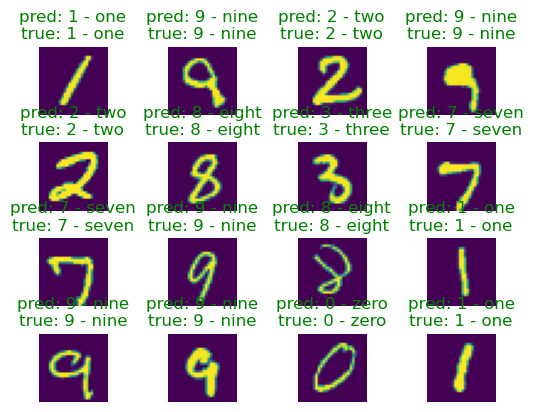

In [ ]:
import random

test_dataloader = DataLoader(
    test_data,
    batch_size=32,
    shuffle=True
)

vgg_model.eval()

images, labels = next(iter(test_dataloader))  # one batch

fig, axes = plt.subplots(4, 4)
fig.subplots_adjust(top=0.85, hspace=0.4)

with torch.no_grad():
    preds = vgg_model(images).argmax(dim=1)

    for ax, img, y, p in zip(axes.flat, images, labels, preds):
        ax.imshow(img.permute(1, 2, 0))
        ax.axis("off")
        ax.set_title(
            f"pred: {train_data.classes[p.item()]}\ntrue: {train_data.classes[y.item()]}",
            color=("green" if p == y else "red"),
            

        )


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

Making predictions: 100%|██████████| 313/313 [00:01<00:00, 168.69it/s]


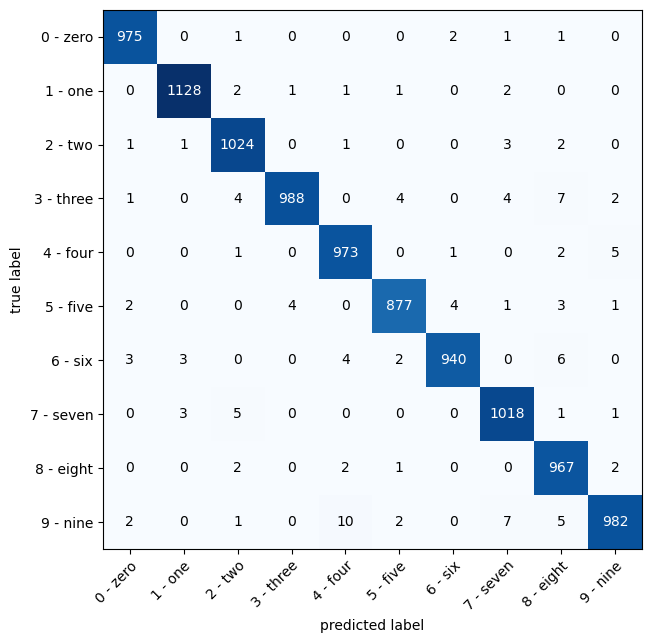

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

test_dataloader = DataLoader(
    test_data,
    batch_size=32,
    shuffle=False
)

y_preds = []
vgg_model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    # Do the forward pass
    y_logit = vgg_model(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    # y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_pred = y_logit.argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(test_data.classes), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=test_data.classes, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
img = torch.randn(size=(1,3,64,64))

conv = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=10)

x  = conv(img)
x.shape


torch.Size([1, 10, 55, 55])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
train_data = torchvision.datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    # target_transform=None # you can transform labels as well
)
test_data = torchvision.datasets.FashionMNIST(root='data', train=False, transform=ToTensor(),download=True)

train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE)
# plt.imshow(imgs.permute(1,2,0), cmap="gray")
# plt.axis("off")


In [22]:
torch.backends.nnpack.enabled = False
vgg_model_fashion  = TinyVGGModel(in_channels=1,hidden_units=10,output_features= len(train_data.classes))

expochs = 3

for epoch in tqdm(range(epochs), "Epochs"):
    train(
        model=vgg_model_fashion,
        loss_fn= nn.CrossEntropyLoss(),
        accuracy_fn=accuracy,
        optimizer=torch.optim.SGD(params=vgg_model_fashion.parameters(), lr=0.1),
        dataloader=train_dataloader
        )
        
    test(
        model=vgg_model_fashion,
        loss_fn= nn.CrossEntropyLoss(),
        accuracy_fn=accuracy,
        dataloader=test_dataloader
    )
    

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

{'loss': tensor(0.6101, grad_fn=<DivBackward0>), 'acc': 0.7781}


Epochs:  20%|██        | 1/5 [00:27<01:51, 27.86s/it]

{'Test loss': tensor(0.4123), 'Test acc': 0.8454472843450479}
{'loss': tensor(0.3584, grad_fn=<DivBackward0>), 'acc': 0.8696}


Epochs:  40%|████      | 2/5 [00:58<01:29, 29.73s/it]

{'Test loss': tensor(0.3727), 'Test acc': 0.8616214057507987}
{'loss': tensor(0.3252, grad_fn=<DivBackward0>), 'acc': 0.88205}


Epochs:  60%|██████    | 3/5 [01:24<00:56, 28.03s/it]

{'Test loss': tensor(0.3808), 'Test acc': 0.8592252396166135}
{'loss': tensor(0.3060, grad_fn=<DivBackward0>), 'acc': 0.88945}


Epochs:  80%|████████  | 4/5 [01:53<00:28, 28.34s/it]

{'Test loss': tensor(0.3132), 'Test acc': 0.8836861022364217}
{'loss': tensor(0.2947, grad_fn=<DivBackward0>), 'acc': 0.8919833333333334}


Epochs: 100%|██████████| 5/5 [02:29<00:00, 29.93s/it]

{'Test loss': tensor(0.3279), 'Test acc': 0.8781948881789138}


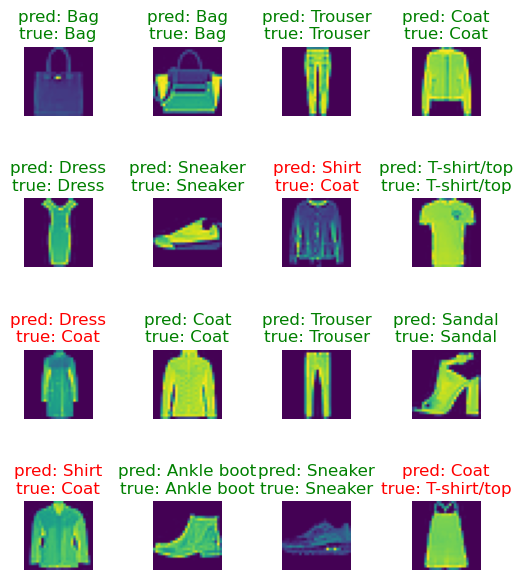

In [45]:
test_dataloader = DataLoader(
    test_data,
    batch_size=32,
    shuffle=True
)

vgg_model_fashion.eval()

images, labels = next(iter(test_dataloader))  # one batch

fig, axes = plt.subplots(4, 4)
fig.subplots_adjust(top=1.2, hspace=1.2)

with torch.no_grad():
    preds = vgg_model_fashion(images).argmax(dim=1)

    for ax, img, y, p in zip(axes.flat, images, labels, preds):
        ax.imshow(img.permute(1, 2, 0))
        ax.axis("off")
        ax.set_title(
            f"pred: {train_data.classes[p.item()]}\ntrue: {train_data.classes[y.item()]}",
            color=("green" if p == y else "red"),
            

        )
